In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import re

In [ ]:
import pandas as pd
train_data = pd.read_json('/content/drive/MyDrive/training_data/train.json').T

In [ ]:
def Faithfulness(original_preds, contrast_preds):
    if len(original_preds) != len(contrast_preds):
        raise ValueError("The lists of predictions must have the same length.")
    faithfulness = sum(abs(o - c) for o, c in zip(original_preds, contrast_preds)) / len(original_preds)
    return faithfulness

def Consistency(original_preds, contrast_preds):
    if len(original_preds) != len(contrast_preds):
        raise ValueError("The lists of predictions must have the same length.")
    consistency = sum(1-abs(o - c) for o, c in zip(original_preds, contrast_preds)) / len(original_preds)
    return consistency

In [ ]:
train_data.head()

,Type,Section_id,Primary_id,Secondary_id,Statement,Label
5bc844fc-e852-4270-bfaf-36ea9eface3d,Comparison,Intervention,NCT01928186,NCT00684983,All the primary trial participants do not rece...,Contradiction
86b7cb3d-6186-4a04-9aa6-b174ab764eed,Single,Eligibility,NCT00662129,NaN,"Patients with Platelet count over 100,000/mm¬¨...",Contradiction
dbed5471-c2fc-45b5-b26f-430c9fa37a37,Comparison,Adverse Events,NCT00093145,NCT00703326,Heart-related adverse events were recorded in ...,Entailment
20c35c89-8d23-4be3-b603-ac0ee0f3b4de,Single,Eligibility,NCT01097642,NaN,Adult Patients with histologic confirmation of...,Contradiction
f17cb242-419d-4f5d-bfa4-41494ed5ac0e,Comparison,Intervention,NCT00852930,NCT02308020,Laser Therapy is in each cohort of the primary...,Contradiction


In [ ]:
for i in train_data.columns:
  print(i, ' - ',train_data[i].isna().sum())

Type  -  0
Section_id  -  0
Primary_id  -  0
Secondary_id  -  1035
Statement  -  0
Label  -  0


In [ ]:
import os
import json

In [ ]:
# Path to the folder containing JSON files
json_folder_path = '/content/drive/MyDrive/training_data/CT json'

In [ ]:
# Function to load JSON data
def load_json_data(filename):
    with open(filename, 'r') as file:
        data = json.load(file)
    return data

In [ ]:
import re

In [ ]:
import pandas as pd
from transformers import BertTokenizer
from sklearn.model_selection import train_test_split
import torch

In [ ]:
def remove_non_alphabetic(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)

In [ ]:
data=pd.read_json('/content/drive/MyDrive/training_data/gold_practice_test.json')

In [ ]:
data = data.T

In [ ]:
data['Intervention'].unique()

array(['Contradiction', 'Paraphrase', 'Text_appended',
       'Numerical_contradiction', nan, 'Numerical_paraphrase'],
      dtype=object)

In [ ]:
contradict_index = []
contradict2=[]
for i in range(0, data.shape[0]):
  if data['Intervention'][i] in ['Contradiction']:
    contradict_index.append(data.index.tolist()[i])
    contradict2.append(data['Causal_type'][i][1])

In [ ]:
original = []
for i in range(data.shape[0]):
    if data['Intervention'][i] in ['Text_appended']:
      if data['Causal_type'][i][1] in contradict2:
        original.append(data.index[i])

In [ ]:
len(original),len(contradict_index)

(600, 600)

In [ ]:
contradict_data = data.loc[contradict_index]

In [ ]:
contradict_data.head()

,Type,Section_id,Primary_id,Statement,Label,Intervention,Causal_type,Secondary_id
14e55d50-c012-4f32-afc5-6f5f7a030667,Single,Adverse Events,NCT00328783,the primary trial documents a comprehensive li...,Contradiction,Contradiction,"[Altering, fef5aedb-21c0-4130-b8a3-cb1df5017c7a]",NaN
64ab5bcd-229a-4aac-8d01-609e514400d7,Single,Intervention,NCT00374322,the patient cohorts in the primary clinical tr...,Contradiction,Contradiction,"[Altering, c40fdf91-9f81-454a-bba9-ec5c950cef6e]",NaN
f0271e34-7791-441b-ad94-a8e2e7f1f909,Single,Results,NCT01644890,cohort 1 of the primary clinical trial had an ...,Contradiction,Contradiction,"[Altering, 8c6314f7-34f5-42a7-ba66-b95d050a6315]",NaN
11073b50-f135-48a1-a8ac-333375a49c14,Single,Eligibility,NCT02186015,children are allowed to participate in the pri...,Contradiction,Contradiction,"[Altering, a805f174-2707-4302-a195-05153ea8523e]",NaN
78ac8091-0f1b-44d1-a760-71bfdc2d46ff,Single,Adverse Events,NCT00191815,none of the participants in the first group of...,Contradiction,Contradiction,"[Preserving, 8e91e404-086e-4063-8d54-83d1b8ebd...",NaN


In [ ]:
original_data=data.loc[original]

In [ ]:
original_data.head()

,Type,Section_id,Primary_id,Statement,Label,Intervention,Causal_type,Secondary_id
6c337426-cff6-4f2c-acab-e7bf15f09cc2,Comparison,Adverse Events,NCT01852032,the primary trial and the secondary trial repo...,Contradiction,Text_appended,"[Preserving, c7a953b0-ac96-4e0a-9c1d-98cf8af28...",NCT01830933
141798cc-9851-4bdf-b8a9-ce688db34e72,Single,Eligibility,NCT00438100,ongoing flucytosine treatments are not permitt...,Entailment,Text_appended,"[Preserving, f10f3b84-e039-4a02-a98b-86d149d9a...",NaN
ec5ca1ce-8399-4213-9f44-53e55b7352db,Comparison,Adverse Events,NCT01216176,child needs help playing with other children i...,Contradiction,Text_appended,"[Preserving, 9c033072-5f94-4d79-af47-126d531f0...",NCT00325234
95f5af8f-1590-4254-bd9f-885b6720b7b5,Single,Eligibility,NCT00375427,Patients must have a Life expectancy of at lea...,Entailment,Text_appended,"[Preserving, 618a3ae1-b22c-4c35-86a6-190c1b5b5...",NaN
41a49fe6-55b7-4f89-bc8c-b0107350a79a,Single,Intervention,NCT00904033,neither of the cohorts in the primary trial ar...,Contradiction,Text_appended,"[Preserving, 63a0a9fc-80b9-450f-b2c6-7aee37ce2...",NaN


In [ ]:
preserving_index = []
preserving2=[]
for i in range(0, data.shape[0]):
  if data['Intervention'][i] in ['Paraphrase']:
    preserving_index.append(data.index.tolist()[i])
    preserving2.append(data['Causal_type'][i][1])

In [ ]:
original_preserving = []
for i in range(data.shape[0]):
    if data['Intervention'][i] in ['Text_appended']:
      if data['Causal_type'][i][1] in preserving2:
        original_preserving.append(data.index[i])

In [ ]:
len(preserving_index), len(original_preserving)

(600, 600)

In [ ]:
original_preserving_data=data.loc[original_preserving]

In [ ]:
original_preserving_data.head()

,Type,Section_id,Primary_id,Statement,Label,Intervention,Causal_type,Secondary_id
6c337426-cff6-4f2c-acab-e7bf15f09cc2,Comparison,Adverse Events,NCT01852032,the primary trial and the secondary trial repo...,Contradiction,Text_appended,"[Preserving, c7a953b0-ac96-4e0a-9c1d-98cf8af28...",NCT01830933
141798cc-9851-4bdf-b8a9-ce688db34e72,Single,Eligibility,NCT00438100,ongoing flucytosine treatments are not permitt...,Entailment,Text_appended,"[Preserving, f10f3b84-e039-4a02-a98b-86d149d9a...",NaN
ec5ca1ce-8399-4213-9f44-53e55b7352db,Comparison,Adverse Events,NCT01216176,child needs help playing with other children i...,Contradiction,Text_appended,"[Preserving, 9c033072-5f94-4d79-af47-126d531f0...",NCT00325234
95f5af8f-1590-4254-bd9f-885b6720b7b5,Single,Eligibility,NCT00375427,Patients must have a Life expectancy of at lea...,Entailment,Text_appended,"[Preserving, 618a3ae1-b22c-4c35-86a6-190c1b5b5...",NaN
41a49fe6-55b7-4f89-bc8c-b0107350a79a,Single,Intervention,NCT00904033,neither of the cohorts in the primary trial ar...,Contradiction,Text_appended,"[Preserving, 63a0a9fc-80b9-450f-b2c6-7aee37ce2...",NaN


In [ ]:
preserving_data=data.loc[preserving_index]

In [ ]:
preserving_data.head()

,Type,Section_id,Primary_id,Statement,Label,Intervention,Causal_type,Secondary_id
ea57b54d-1912-4d9f-bcf7-7f423aed195b,Comparison,Intervention,NCT01572727,"in the primary clinical trial, patients receiv...",Entailment,Paraphrase,"[Preserving, 3ba42f68-a643-4d10-afd0-cbb358d05...",NCT00328783
47f4c385-4dd8-4b6e-a365-bb2fac258ab9,Single,Results,NCT00915603,"in cohort 1 of the primary clinical trial, the...",Contradiction,Paraphrase,"[Preserving, 0cef8c8e-7986-46c7-a597-c5733a989...",NaN
d31f179f-1253-44c8-8fc6-167f7b3d41db,Comparison,Intervention,NCT01572727,the intake of paclitaxel for patients in the p...,Entailment,Paraphrase,"[Preserving, 3ba42f68-a643-4d10-afd0-cbb358d05...",NCT00328783
76236597-7a5e-4042-b1c4-ddd5a4aa57e7,Comparison,Results,NCT00852930,the collection of overall survival metrics of ...,Contradiction,Paraphrase,"[Preserving, dc4c57b0-8c75-494e-81b0-3528df85e...",NCT02915744
572c52ba-9518-4b72-9a32-a08604808764,Single,Results,NCT00357110,the primary clinical trial reported 6 losses i...,Contradiction,Paraphrase,"[Preserving, f114846e-79d8-4712-add0-bb34b65d4...",NaN


In [ ]:
c=0
for i in original:
  if i not in original_preserving:
    c+=1
c

0

In [ ]:
def pre_processing(data,json_folder_path,remove_non_alphabetic):
  data['Primary_id_intervention']=None
  data['Primary_id_Eligibility']=None
  data['Primary_id_results']=None
  data['Primary_id_Adverse_events']=None
  for i in range(0,len(data['Primary_id'])):
      json_file_path = os.path.join(json_folder_path, data['Primary_id'][i] + '.json')
      if os.path.exists(json_file_path):
          json_data = load_json_data(json_file_path)
          data['Primary_id_intervention'][i] = json_data['Intervention']
          data['Primary_id_Eligibility'][i]=json_data['Eligibility']
          data['Primary_id_results'][i]=json_data['Results']
          data['Primary_id_Adverse_events'][i]=json_data['Adverse Events']
      else:
          print(f"File not found: {json_file_path}")
          data['Primary_id_intervention'][i] = None
          data['Primary_id_Eligibility'][i]=None
          data['Primary_id_results'][i]=None
          data['Primary_id_Adverse_events'][i]=None
  data['Secondary_id_intervention']="None"
  data['Secondary_id_Eligibility']="None"
  data['Secondary_id_results']="None"
  data['Secondary_id_Adverse_events']="None"
  for i in range(0,len(data['Secondary_id'])):
      if data['Type'][i]=='Comparison':
        json_file_path = os.path.join(json_folder_path, data['Secondary_id'][i] + '.json')
        if os.path.exists(json_file_path):
          json_data = load_json_data(json_file_path)
          data['Secondary_id_intervention'][i] = json_data['Intervention']
          data['Secondary_id_Eligibility'][i]=json_data['Eligibility']
          data['Secondary_id_results'][i]=json_data['Results']
          data['Secondary_id_Adverse_events'][i]=json_data['Adverse Events']
        else:
          data['Secondary_id_intervention'][i] = "None"
          data['Secondary_id_Eligibility'][i]="None"
          data['Secondary_id_results'][i]="None"
          data['Secondary_id_Adverse_events'][i]="None"
  for i in range(0,data.shape[0]):
    data1=data['Primary_id_intervention'][i]
    joined_string = ' '.join(data1)
    data['Primary_id_intervention'][i] = re.sub(r'[^a-zA-Z0-9\s]', '', joined_string)
    data1=data['Primary_id_Eligibility'][i]
    joined_string = ' '.join(data1)
    data['Primary_id_Eligibility'][i] = re.sub(r'[^a-zA-Z0-9\s]', '', joined_string)
    data1=data['Primary_id_results'][i]
    joined_string = ' '.join(data1)
    data['Primary_id_results'][i] = re.sub(r'[^a-zA-Z0-9\s]', '', joined_string)
    data1=data['Primary_id_Adverse_events'][i]
    joined_string = ' '.join(data1)
    data['Primary_id_Adverse_events'][i] = re.sub(r'[^a-zA-Z0-9\s]', '', joined_string)
    data1=data['Secondary_id_intervention'][i]
    joined_string = ' '.join(data1)
    data['Secondary_id_intervention'][i] = re.sub(r'[^a-zA-Z0-9\s]', '', joined_string)
    data1=data['Secondary_id_Eligibility'][i]
    joined_string = ' '.join(data1)
    data['Secondary_id_Eligibility'][i] = re.sub(r'[^a-zA-Z0-9\s]', '', joined_string)
    data1=data['Secondary_id_results'][i]
    joined_string = ' '.join(data1)
    data['Secondary_id_results'][i] = re.sub(r'[^a-zA-Z0-9\s]', '', joined_string)
    data1=data['Secondary_id_Adverse_events'][i]
    joined_string = ' '.join(data1)
    data['Secondary_id_Adverse_events'][i] = re.sub(r'[^a-zA-Z0-9\s]', '', joined_string)
  for i in range(0,data.shape[0]):
    if data['Secondary_id_intervention'][i]=="N o n e":
      data['Secondary_id_Adverse_events'][i]="None"
      data['Secondary_id_Eligibility'][i]="None"
      data['Secondary_id_intervention'][i]="None"
      data['Secondary_id_results'][i]="None"
  data['Concatenated_Text'] = "None"
  for i in range(data.shape[0]):
      if data['Section_id'][i] == "Intervention":
          primary_id = str(data['Primary_id_intervention'][i])
          secondary_id = str(data['Secondary_id_intervention'][i])
          statement = str(data['Statement'][i])
          data['Concatenated_Text'][i] = 'The primary id intervention is ' + primary_id + ' and the secondary id intervention is ' + secondary_id + ' and the Statement is ' + statement
      elif data['Section_id'][i] == 'Eligibility':
          primary_id = str(data['Primary_id_Eligibility'][i])
          secondary_id = str(data['Secondary_id_Eligibility'][i])
          statement = str(data['Statement'][i])
          data['Concatenated_Text'][i] = 'The primary id eligibility is ' + primary_id + ' and the secondary id eligibility is ' + secondary_id + ' and the Statement is ' + statement
      elif data['Section_id'][i] == 'Adverse Events':
          primary_id = str(data['Primary_id_Adverse_events'][i])
          secondary_id = str(data['Secondary_id_Adverse_events'][i])
          statement = str(data['Statement'][i])
          data['Concatenated_Text'][i] = 'The primary id adverse events is ' + primary_id + ' and the secondary id adverse events is ' + secondary_id + ' and the Statement is ' + statement
      elif data['Section_id'][i] == 'Results':
          primary_id = str(data['Primary_id_results'][i])
          secondary_id = str(data['Secondary_id_results'][i])
          statement = str(data['Statement'][i])
          data['Concatenated_Text'][i] = 'The primary id results is ' + primary_id + ' and the secondary id results is ' + secondary_id + ' and the Statement is ' + statement

  data['Concatenated_Text'] = data['Concatenated_Text'].astype('string')
  data['Concatenated_Text'] = data['Concatenated_Text'].apply(remove_non_alphabetic)
  data['Concatenated_Text'] = data['Concatenated_Text'].str.lower()
  return data

In [ ]:
validation_data=pd.read_json('/content/drive/MyDrive/training_data/dev.json')
validation_data=validation_data.T

In [ ]:
gold_data = pd.read_json('/content/drive/MyDrive/training_data/gold_practice_test.json').T

In [ ]:
test_data=pd.read_json('/content/drive/MyDrive/training_data/test.json').T

In [ ]:
train_data=pre_processing(train_data,json_folder_path,remove_non_alphabetic)
validation_data=pre_processing(validation_data,json_folder_path,remove_non_alphabetic)
contradict_data=pre_processing(contradict_data,json_folder_path,remove_non_alphabetic)
original_data=pre_processing(original_data,json_folder_path,remove_non_alphabetic)
preserving_data=pre_processing(preserving_data,json_folder_path,remove_non_alphabetic)
gold_data = pre_processing(gold_data,json_folder_path,remove_non_alphabetic)

In [ ]:
test_data = pre_processing(test_data,json_folder_path,remove_non_alphabetic)

In [ ]:
train_data.head()

,Type,Section_id,Primary_id,Secondary_id,Statement,Label,Primary_id_intervention,Primary_id_Eligibility,Primary_id_results,Primary_id_Adverse_events,Secondary_id_intervention,Secondary_id_Eligibility,Secondary_id_results,Secondary_id_Adverse_events,Concatenated_Text
5bc844fc-e852-4270-bfaf-36ea9eface3d,Comparison,Intervention,NCT01928186,NCT00684983,All the primary trial participants do not rece...,Contradiction,INTERVENTION 1 Diagnostic FLT PET Patient...,Inclusion Criteria A new diagnosis of invasi...,Outcome Measurement Percent Change in Net I...,Adverse Events 1 Total 028 000,INTERVENTION 1 Arm A Patients receive ora...,Inclusion Criteria Histologically confirmed ...,Outcome Measurement Progressionfree Surviva...,Adverse Events 1 Total 419 2105 Hemoglobin...,the primary id intervention is intervention 1 ...
86b7cb3d-6186-4a04-9aa6-b174ab764eed,Single,Eligibility,NCT00662129,NaN,"Patients with Platelet count over 100,000/mm¬¨...",Contradiction,INTERVENTION 1 Paclitaxel Gemcitabine Bev...,DISEASE CHARACTERISTICS Histologically or cy...,Outcome Measurement 6month Progressionfree ...,Adverse Events 1 Total 2049 4082 Febrile n...,None,None,None,None,the primary id eligibility is disease characte...
dbed5471-c2fc-45b5-b26f-430c9fa37a37,Comparison,Adverse Events,NCT00093145,NCT00703326,Heart-related adverse events were recorded in ...,Entailment,INTERVENTION 1 Albuminbound Paclitaxel Carb...,Inclusion Criteria Confirmed adenocarcinoma ...,Outcome Measurement Percentage of Participa...,Adverse Events 1 Total 532 1563 Febrile ne...,INTERVENTION 1 Ramucirumab IMC1121B Doceta...,Inclusion Criteria Participant is able to pr...,Outcome Measurement ProgressionFree Surviva...,Adverse Events 1 Total 285752 3790 Anaemia...,the primary id adverse events is adverse event...
20c35c89-8d23-4be3-b603-ac0ee0f3b4de,Single,Eligibility,NCT01097642,NaN,Adult Patients with histologic confirmation of...,Contradiction,INTERVENTION 1 Ixabepilone Brand name is ...,Inclusion Criteria Patients with histologic ...,Outcome Measurement Complete Response Rate ...,Adverse Events 1 Total 215 1333 Neutropeni...,None,None,None,None,the primary id eligibility is inclusion criter...
f17cb242-419d-4f5d-bfa4-41494ed5ac0e,Comparison,Intervention,NCT00852930,NCT02308020,Laser Therapy is in each cohort of the primary...,Contradiction,INTERVENTION 1 Laser Therapy Alone therap...,Inclusion Criteria Breast cancer survivors w...,Outcome Measurement LDex Change Bioimpeda...,Adverse Events 1 Total 015 000 Adverse Event...,INTERVENTION 1 Part A Abemaciclib HR HER2 B...,Inclusion Criteria Have brain metastases sec...,Outcome Measurement Percentage of Participa...,Adverse Events 1 Total 627 2222 Anaemia 02...,the primary id intervention is intervention 1 ...


In [ ]:
for i in train_data.columns:
  print(i, ' - ',train_data[i].isna().sum())

Type  -  0
Section_id  -  0
Primary_id  -  0
Secondary_id  -  1035
Statement  -  0
Label  -  0
Primary_id_intervention  -  0
Primary_id_Eligibility  -  0
Primary_id_results  -  0
Primary_id_Adverse_events  -  0
Secondary_id_intervention  -  0
Secondary_id_Eligibility  -  0
Secondary_id_results  -  0
Secondary_id_Adverse_events  -  0
Concatenated_Text  -  0


In [ ]:
gold_data.head()

,Type,Section_id,Primary_id,Statement,Label,Intervention,Causal_type,Secondary_id,Primary_id_intervention,Primary_id_Eligibility,Primary_id_results,Primary_id_Adverse_events,Secondary_id_intervention,Secondary_id_Eligibility,Secondary_id_results,Secondary_id_Adverse_events,Concatenated_Text
14e55d50-c012-4f32-afc5-6f5f7a030667,Single,Adverse Events,NCT00328783,the primary trial documents a comprehensive li...,Contradiction,Contradiction,"[Altering, fef5aedb-21c0-4130-b8a3-cb1df5017c7a]",NaN,INTERVENTION 1 Active Breathing Coordinator...,Inclusion Criteria Requiring adjuvant or pos...,Outcome Measurement Dosimetric Evaluation M...,Adverse Events 1 Total 00,None,None,None,None,the primary id adverse events is adverse event...
ea57b54d-1912-4d9f-bcf7-7f423aed195b,Comparison,Intervention,NCT01572727,"in the primary clinical trial, patients receiv...",Entailment,Paraphrase,"[Preserving, 3ba42f68-a643-4d10-afd0-cbb358d05...",NCT00328783,INTERVENTION 1 BKM120 and Paclitaxel Adul...,Inclusion Criteria Breast cancer that is loc...,Outcome Measurement Progressionfree Surviva...,Adverse Events 1 Total 61202 3020 FEBRILE ...,INTERVENTION 1 Active Breathing Coordinator...,Inclusion Criteria Requiring adjuvant or pos...,Outcome Measurement Dosimetric Evaluation M...,Adverse Events 1 Total 00,the primary id intervention is intervention 1 ...
6c337426-cff6-4f2c-acab-e7bf15f09cc2,Comparison,Adverse Events,NCT01852032,the primary trial and the secondary trial repo...,Contradiction,Text_appended,"[Preserving, c7a953b0-ac96-4e0a-9c1d-98cf8af28...",NCT01830933,INTERVENTION 1 Breast Cancer Patients Tom...,Inclusion Criteria 35 years of age or older ...,Outcome Measurement Beta of CT Coronal View...,Adverse Events 1 Total 023 000,INTERVENTION 1 Usual Care Usual Care is t...,Inclusion Criteria Patient component Women...,Outcome Measurement Knowledge of Breast Can...,Adverse Events 1 Total 0655 000 Adverse Even...,the primary id adverse events is adverse event...
141798cc-9851-4bdf-b8a9-ce688db34e72,Single,Eligibility,NCT00438100,ongoing flucytosine treatments are not permitt...,Entailment,Text_appended,"[Preserving, f10f3b84-e039-4a02-a98b-86d149d9a...",NaN,INTERVENTION 1 Capecitabine Arm Capecitab...,Inclusion Criteria Biopsydiagnosed breast ca...,Outcome Measurement Progression Free Surviv...,Adverse Events 1 Total 071 000 Adverse Event...,None,None,None,None,the primary id eligibility is inclusion criter...
fdbb037a-8084-4267-9143-f989d26726ab,Single,Results,NCT00217399,all the primary trial patients had a minimum o...,Contradiction,Numerical_contradiction,"[Preserving, 985bc5a0-bc21-447f-92f1-150e23ede...",NaN,INTERVENTION 1 Sorafenib and Anastrozole ...,Inclusion Criteria Histologically or cytolog...,Outcome Measurement Complete Response Part...,Adverse Events 1 Total 1235 3429 handfoot ...,None,None,None,None,the primary id results is outcome measurement ...


In [ ]:
validation_data.head()

,Type,Section_id,Primary_id,Statement,Label,Secondary_id,Primary_id_intervention,Primary_id_Eligibility,Primary_id_results,Primary_id_Adverse_events,Secondary_id_intervention,Secondary_id_Eligibility,Secondary_id_results,Secondary_id_Adverse_events,Concatenated_Text
1adc970c-d433-44d0-aa09-d3834986f7a2,Single,Results,NCT00066573,there is a 13.2% difference between the result...,Contradiction,NaN,INTERVENTION 1 Exemestane Patients receiv...,DISEASE CHARACTERISTICS Histologically confi...,Outcome Measurement Eventfree Survival Ev...,Adverse Events 1 Total 193761 051 Cardiac ...,None,None,None,None,the primary id results is outcome measurement ...
6b9162d0-0816-46d4-81af-c60028dcc63b,Comparison,Eligibility,NCT00425854,Patients with significantly elevated ejection ...,Contradiction,NCT01224678,INTERVENTION 1 Cohort B Patients with HER...,Inclusion criteria Inclusion Criteria Female...,Outcome Measurement Objective Response OR ...,Adverse Events 1 Total 1329 4483 Anaemia 1...,INTERVENTION 1 Placebo Patients receive o...,Premenopausal women 55 years of age or younger...,Outcome Measurement Percent Change Between ...,Adverse Events 1 Total 0150 000 Adverse Even...,the primary id eligibility is inclusion criter...
0b6cc8e3-69ee-4a91-b93d-2ad3fddce65f,Comparison,Adverse Events,NCT02273973,a significant number of the participants in th...,Contradiction,NCT00281697,INTERVENTION 1 Experimental Taselisib Letr...,Inclusion Criteria Female participants Pos...,Outcome Measurement Percentage of Participa...,Adverse Events 1 Total 20167 1198 Cardiac ...,INTERVENTION 1 Standard Chemotherapy Bevac...,Inclusion Criteria Signed informed consent f...,Outcome Measurement Progressionfree Surviva...,Adverse Events 1 Total 112458 2445 Febrile...,the primary id adverse events is adverse event...
cc1f712a-2116-4e40-9810-f315e3fa5ff8,Single,Results,NCT00593346,the primary trial does not report the PFS or o...,Entailment,NaN,INTERVENTION 1 Accelerated Partial Breast B...,Inclusion Criteria AJCC stage 0 I or II TisN...,Outcome Measurement Local Control Using Ips...,Adverse Events 1 Total 0151 000,None,None,None,None,the primary id results is outcome measurement ...
904061c0-14fa-4f13-9118-9a41e24fa8eb,Single,Eligibility,NCT02340221,Prior treatment with fulvestrant or with a pho...,Contradiction,NaN,INTERVENTION 1 PlaceboFulvestrant Partici...,Inclusion Criteria Postmenopausal women with...,Outcome Measurement ProgressionFree Surviva...,Adverse Events 1 Total 19213 892 Pancytope...,None,None,None,None,the primary id eligibility is inclusion criter...


In [ ]:
contradict_data.head()

,Type,Section_id,Primary_id,Statement,Label,Intervention,Causal_type,Secondary_id,Primary_id_intervention,Primary_id_Eligibility,Primary_id_results,Primary_id_Adverse_events,Secondary_id_intervention,Secondary_id_Eligibility,Secondary_id_results,Secondary_id_Adverse_events,Concatenated_Text
14e55d50-c012-4f32-afc5-6f5f7a030667,Single,Adverse Events,NCT00328783,the primary trial documents a comprehensive li...,Contradiction,Contradiction,"[Altering, fef5aedb-21c0-4130-b8a3-cb1df5017c7a]",NaN,INTERVENTION 1 Active Breathing Coordinator...,Inclusion Criteria Requiring adjuvant or pos...,Outcome Measurement Dosimetric Evaluation M...,Adverse Events 1 Total 00,None,None,None,None,the primary id adverse events is adverse event...
64ab5bcd-229a-4aac-8d01-609e514400d7,Single,Intervention,NCT00374322,the patient cohorts in the primary clinical tr...,Contradiction,Contradiction,"[Altering, c40fdf91-9f81-454a-bba9-ec5c950cef6e]",NaN,INTERVENTION 1 Lapatinib 1500 mg Particip...,Inclusion Criteria Have histologically or cy...,Outcome Measurement Number of Participants ...,Adverse Events 1 Total 991573 629 Neutrope...,None,None,None,None,the primary id intervention is intervention 1 ...
f0271e34-7791-441b-ad94-a8e2e7f1f909,Single,Results,NCT01644890,cohort 1 of the primary clinical trial had an ...,Contradiction,Contradiction,"[Altering, 8c6314f7-34f5-42a7-ba66-b95d050a6315]",NaN,INTERVENTION 1 NK105 received NK105 65 mg...,Inclusion Criteria Written informed consent ...,Outcome Measurement Progression Free Surviv...,Adverse Events 1 Total 34214 1589 Leukocyt...,None,None,None,None,the primary id results is outcome measurement ...
11073b50-f135-48a1-a8ac-333375a49c14,Single,Eligibility,NCT02186015,children are allowed to participate in the pri...,Contradiction,Contradiction,"[Altering, a805f174-2707-4302-a195-05153ea8523e]",NaN,INTERVENTION 1 Cholecalciferol Enrolled w...,Inclusion Criteria Metastatic breast cancer ...,Outcome Measurement Change in Serum 25OHD ...,Adverse Events 1 Total 011 000 Adverse Event...,None,None,None,None,the primary id eligibility is inclusion criter...
78ac8091-0f1b-44d1-a760-71bfdc2d46ff,Single,Adverse Events,NCT00191815,none of the participants in the first group of...,Contradiction,Contradiction,"[Preserving, 8e91e404-086e-4063-8d54-83d1b8ebd...",NaN,INTERVENTION 1 Gemcitabine Cisplatin Gem...,Inclusion Criteria You are female in the age...,Outcome Measurement Objective Tumor Respons...,Adverse Events 1 Total 6 Atrial fibrillati...,None,None,None,None,the primary id adverse events is adverse event...


In [ ]:
original_data.head()

,Type,Section_id,Primary_id,Statement,Label,Intervention,Causal_type,Secondary_id,Primary_id_intervention,Primary_id_Eligibility,Primary_id_results,Primary_id_Adverse_events,Secondary_id_intervention,Secondary_id_Eligibility,Secondary_id_results,Secondary_id_Adverse_events,Concatenated_Text
6c337426-cff6-4f2c-acab-e7bf15f09cc2,Comparison,Adverse Events,NCT01852032,the primary trial and the secondary trial repo...,Contradiction,Text_appended,"[Preserving, c7a953b0-ac96-4e0a-9c1d-98cf8af28...",NCT01830933,INTERVENTION 1 Breast Cancer Patients Tom...,Inclusion Criteria 35 years of age or older ...,Outcome Measurement Beta of CT Coronal View...,Adverse Events 1 Total 023 000,INTERVENTION 1 Usual Care Usual Care is t...,Inclusion Criteria Patient component Women...,Outcome Measurement Knowledge of Breast Can...,Adverse Events 1 Total 0655 000 Adverse Even...,the primary id adverse events is adverse event...
141798cc-9851-4bdf-b8a9-ce688db34e72,Single,Eligibility,NCT00438100,ongoing flucytosine treatments are not permitt...,Entailment,Text_appended,"[Preserving, f10f3b84-e039-4a02-a98b-86d149d9a...",NaN,INTERVENTION 1 Capecitabine Arm Capecitab...,Inclusion Criteria Biopsydiagnosed breast ca...,Outcome Measurement Progression Free Surviv...,Adverse Events 1 Total 071 000 Adverse Event...,None,None,None,None,the primary id eligibility is inclusion criter...
ec5ca1ce-8399-4213-9f44-53e55b7352db,Comparison,Adverse Events,NCT01216176,child needs help playing with other children i...,Contradiction,Text_appended,"[Preserving, 9c033072-5f94-4d79-af47-126d531f0...",NCT00325234,INTERVENTION 1 Phase 1 Cohort A Dual tre...,Inclusion Criteria Phase 1 Cohort A Female ...,Outcome Measurement Phase I Cohort A Maximu...,Adverse Events 1 Total 312 2500 Atrial fib...,INTERVENTION 1 PemetrexedCarboplatin Peme...,Inclusion Criteria Females with histologic o...,Outcome Measurement Tumor Response Rate P...,Adverse Events 1 Total 1865 2769 Anaemia 5...,the primary id adverse events is adverse event...
95f5af8f-1590-4254-bd9f-885b6720b7b5,Single,Eligibility,NCT00375427,Patients must have a Life expectancy of at lea...,Entailment,Text_appended,"[Preserving, 618a3ae1-b22c-4c35-86a6-190c1b5b5...",NaN,INTERVENTION 1 Zoledronic Acid Every 3 Mont...,Inclusion criteria Female patients 18 years...,Outcome Measurement Annual Overall Skeletal...,Adverse Events 1 Total 21209 1005 Anaemia ...,None,None,None,None,the primary id eligibility is inclusion criter...
41a49fe6-55b7-4f89-bc8c-b0107350a79a,Single,Intervention,NCT00904033,neither of the cohorts in the primary trial ar...,Contradiction,Text_appended,"[Preserving, 63a0a9fc-80b9-450f-b2c6-7aee37ce2...",NaN,INTERVENTION 1 No Exercise Multivitamin A...,Inclusion Criteria Must be female Women of...,Outcome Measurement Bone Resorption Exercis...,Adverse Events 1 Total 010 000 Adverse Event...,None,None,None,None,the primary id intervention is intervention 1 ...


In [ ]:
preserving_data.head()

,Type,Section_id,Primary_id,Statement,Label,Intervention,Causal_type,Secondary_id,Primary_id_intervention,Primary_id_Eligibility,Primary_id_results,Primary_id_Adverse_events,Secondary_id_intervention,Secondary_id_Eligibility,Secondary_id_results,Secondary_id_Adverse_events,Concatenated_Text
ea57b54d-1912-4d9f-bcf7-7f423aed195b,Comparison,Intervention,NCT01572727,"in the primary clinical trial, patients receiv...",Entailment,Paraphrase,"[Preserving, 3ba42f68-a643-4d10-afd0-cbb358d05...",NCT00328783,INTERVENTION 1 BKM120 and Paclitaxel Adul...,Inclusion Criteria Breast cancer that is loc...,Outcome Measurement Progressionfree Surviva...,Adverse Events 1 Total 61202 3020 FEBRILE ...,INTERVENTION 1 Active Breathing Coordinator...,Inclusion Criteria Requiring adjuvant or pos...,Outcome Measurement Dosimetric Evaluation M...,Adverse Events 1 Total 00,the primary id intervention is intervention 1 ...
47f4c385-4dd8-4b6e-a365-bb2fac258ab9,Single,Results,NCT00915603,"in cohort 1 of the primary clinical trial, the...",Contradiction,Paraphrase,"[Preserving, 0cef8c8e-7986-46c7-a597-c5733a989...",NaN,INTERVENTION 1 PaclitaxelBevacizumabEveroli...,Inclusion Criteria Female or male patients 1...,Outcome Measurement ProgressionFree Surviva...,Adverse Events 1 Total 1655 2909 NEUTROPEN...,None,None,None,None,the primary id results is outcome measurement ...
d31f179f-1253-44c8-8fc6-167f7b3d41db,Comparison,Intervention,NCT01572727,the intake of paclitaxel for patients in the p...,Entailment,Paraphrase,"[Preserving, 3ba42f68-a643-4d10-afd0-cbb358d05...",NCT00328783,INTERVENTION 1 BKM120 and Paclitaxel Adul...,Inclusion Criteria Breast cancer that is loc...,Outcome Measurement Progressionfree Surviva...,Adverse Events 1 Total 61202 3020 FEBRILE ...,INTERVENTION 1 Active Breathing Coordinator...,Inclusion Criteria Requiring adjuvant or pos...,Outcome Measurement Dosimetric Evaluation M...,Adverse Events 1 Total 00,the primary id intervention is intervention 1 ...
76236597-7a5e-4042-b1c4-ddd5a4aa57e7,Comparison,Results,NCT00852930,the collection of overall survival metrics of ...,Contradiction,Paraphrase,"[Preserving, dc4c57b0-8c75-494e-81b0-3528df85e...",NCT02915744,INTERVENTION 1 Laser Therapy Alone therap...,Inclusion Criteria Breast cancer survivors w...,Outcome Measurement LDex Change Bioimpeda...,Adverse Events 1 Total 015 000 Adverse Event...,INTERVENTION 1 NKTR102 In Group A NKTR102...,Inclusion Criteria Female or male age 18 ye...,Outcome Measurement Overall Survival OS of ...,Adverse Events 1 Total 3390 3667 Febrile N...,the primary id results is outcome measurement ...
572c52ba-9518-4b72-9a32-a08604808764,Single,Results,NCT00357110,the primary clinical trial reported 6 losses i...,Contradiction,Paraphrase,"[Preserving, f114846e-79d8-4712-add0-bb34b65d4...",NaN,INTERVENTION 1 Fulvestrant Anastrozole f...,Inclusion Criteria Postmenopausal women with...,Outcome Measurement Patients Eventfree at 1...,Adverse Events 1 Total 16 1667 Goitre 06 0...,None,None,None,None,the primary id results is outcome measurement ...


In [ ]:
test_data.head()

,Type,Section_id,Primary_id,Secondary_id,Statement,Primary_id_intervention,Primary_id_Eligibility,Primary_id_results,Primary_id_Adverse_events,Secondary_id_intervention,Secondary_id_Eligibility,Secondary_id_results,Secondary_id_Adverse_events,Concatenated_Text
47468741-3624-4321-90ee-1c680a293b25,Comparison,Adverse Events,NCT00687102,NCT00819182,the record shows 5 total cases of asthenia and...,INTERVENTION 1 Star Participants Assigned t...,Inclusion Criteria Women enrolled in STAR tr...,Outcome Measurement Mean Change From Baseli...,Adverse Events 1 Total 0733 000 Adverse Even...,INTERVENTION 1 Paced Respiration The pace...,Inclusion Criteria At least 18 years of age ...,Outcome Measurement Hot Flash Frequency P...,Adverse Events 1 Total 088 000 Adverse Event...,the primary id adverse events is adverse event...
93e6ed2b-1e3f-4cbe-a49e-cbc74b31e1aa,Single,Eligibility,NCT01772004,NaN,'the primary clinical trial is open for partic...,INTERVENTION 1 Dose Escalation Cohort Avelu...,Inclusion Criteria for dose escalation and exp...,Outcome Measurement Dose Escalation Cohort ...,Adverse Events 1 Total 34 7500 Anaemia 04...,None,None,None,None,the primary id eligibility is inclusion criter...
ad9fe1aa-9798-4c53-ab23-23ac2924918c,Single,Intervention,NCT00118157,NaN,patients participating in the primary trial re...,INTERVENTION 1 Arm 1 Patients receive ora...,Inclusion Criteria Primary adenocarcinoma of...,Outcome Measurement Tumor Response Rate Com...,Adverse Events 1 Total 1919 10000 Hemolysi...,None,None,None,None,the primary id intervention is intervention 1 ...
cdcb40f6-994c-4085-869a-dab87e67ba04,Single,Results,NCT01106898,NaN,"in the primary clinical trial, 97% of patients...",INTERVENTION 1 Treatment Chemotherapy With ...,Inclusion Criteria Histologically confirmed ...,Outcome Measurement Recurrencefree Survival...,Adverse Events 1 Total 16102 1569 Febrile ...,None,None,None,None,the primary id results is outcome measurement ...
7df66c3f-de87-4542-9797-06325684db65,Comparison,Adverse Events,NCT02002533,NCT02734979,the primary trial has 4 more adverse events re...,INTERVENTION 1 All Participants All peopl...,Inclusion Criteria Newly diagnosed breast ca...,Outcome Measurement Percentage of Eligible ...,Adverse Events 1 Total 034 000,INTERVENTION 1 Biobridge and Lymph Node Tra...,Inclusion Criteria The subject must be a bre...,Outcome Measurement Change in Limb Volume ...,Adverse Events 1 Total 01 000,the primary id adverse events is adverse event...


In [ ]:
def embeddings(data, tokenizer):
  inputs = tokenizer(data['Concatenated_Text'].tolist(), padding=True, truncation=True, return_tensors="pt")
  label_mapping = {'Contradiction': 0, 'Entailment': 1}
  labels = data['Label'].replace(label_mapping).values
  labels = torch.tensor(labels)
  train_inputs=inputs['input_ids']
  train_labels=labels
  train_masks=inputs['attention_mask']
  return train_inputs, train_labels, train_masks

In [ ]:
import torch
from transformers import AutoTokenizer

def preprocess_data(data, tokenizer):
    inputs = tokenizer(data['Concatenated_Text'].tolist(), padding=True, truncation=True, return_tensors="pt")
    train_inputs = inputs['input_ids']
    train_masks = inputs['attention_mask']

    return train_inputs, train_masks


In [ ]:
label_mapping = {'Contradiction': 0, 'Entailment': 1}

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


## Roberta

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("UMCU/MedRoBERTa.nl_NegationDetection")
model = AutoModelForSequenceClassification.from_pretrained("UMCU/MedRoBERTa.nl_NegationDetection")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.19k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/893k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/539k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.54M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/502M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at UMCU/MedRoBERTa.nl_NegationDetection and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
tokenizer.model_max_length=512

In [ ]:
train_inputs, train_labels, train_masks=embeddings(train_data, tokenizer)
val_inputs, val_labels, val_masks=embeddings(validation_data, tokenizer)
contradict_inputs, contradict_labels, contradict_masks=embeddings(contradict_data, tokenizer)
original_inputs, original_labels, original_masks=embeddings(original_data, tokenizer)
preserving_inputs, preserving_labels, preserving_masks=embeddings(preserving_data, tokenizer)
gold_inputs, gold_labels, gold_masks = embeddings(gold_data, tokenizer)

In [ ]:
test_inputs, test_masks=preprocess_data(test_data, tokenizer)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
import torch.optim as optim

batch_size = 16

train_data_t = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data_t)
train_dataloader = DataLoader(train_data_t, sampler=train_sampler, batch_size=batch_size)

validation_data_t = TensorDataset(val_inputs, val_masks, val_labels)
validation_sampler = SequentialSampler(validation_data_t)
validation_dataloader = DataLoader(validation_data_t, sampler=validation_sampler, batch_size=batch_size)

contradict_data_t = TensorDataset(contradict_inputs, contradict_masks, contradict_labels)
contradict_sampler = SequentialSampler(contradict_data_t)
contradict_dataloader = DataLoader(contradict_data_t, sampler=contradict_sampler, batch_size=batch_size)

original_data_t = TensorDataset(original_inputs, original_masks, original_labels)
original_sampler = SequentialSampler(original_data_t)
original_dataloader = DataLoader(original_data_t, sampler=original_sampler, batch_size=batch_size)

preserving_data_t = TensorDataset(preserving_inputs, preserving_masks, preserving_labels)
preserving_sampler = SequentialSampler(preserving_data_t)
preserving_dataloader = DataLoader(preserving_data_t, sampler=preserving_sampler, batch_size=batch_size)

gold_data_t = TensorDataset(gold_inputs, gold_masks, gold_labels)
gold_sampler = SequentialSampler(gold_data_t)
gold_dataloader = DataLoader(gold_data_t, sampler=gold_sampler, batch_size=batch_size)

test_data_t = TensorDataset(test_inputs, test_masks)
test_dataloader = DataLoader(test_data_t, batch_size=batch_size)

optimizer = optim.AdamW(model.parameters(), lr=2e-5)


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


In [ ]:
from sklearn.metrics import accuracy_score

model.train()
model = model.to(device)
epochs=[]
accuracy_values=[]
loss_values=[]
for epoch in range(40):
    total_correct = 0
    total_samples = 0
    total_loss=0

    for step, batch in enumerate(train_dataloader):
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch
        optimizer.zero_grad()

        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        logits = outputs.logits.detach().cpu().numpy()
        preds = np.argmax(logits, axis=1)
        labels = b_labels.detach().cpu().numpy()
        batch_correct = np.sum(preds == labels)
        batch_samples = labels.size
        total_correct += batch_correct
        total_samples += batch_samples

    avg_epoch_loss = total_loss / len(train_dataloader)
    loss_values.append(avg_epoch_loss)
    epoch_accuracy = total_correct / total_samples
    epochs.append(epoch)
    accuracy_values.append(epoch_accuracy)

    print(f'Epoch {epoch + 1}, Training Accuracy: {epoch_accuracy:.4f}, Loss: {avg_epoch_loss:.4f}')


Epoch 1, Training Accuracy: 0.5006, Loss: 0.7410
Epoch 2, Training Accuracy: 0.5041, Loss: 0.7131
Epoch 3, Training Accuracy: 0.4894, Loss: 0.7066
Epoch 4, Training Accuracy: 0.4847, Loss: 0.7105
Epoch 5, Training Accuracy: 0.4929, Loss: 0.7039
Epoch 6, Training Accuracy: 0.4941, Loss: 0.7012
Epoch 7, Training Accuracy: 0.4929, Loss: 0.7070
Epoch 8, Training Accuracy: 0.5024, Loss: 0.7060
Epoch 9, Training Accuracy: 0.5035, Loss: 0.7016
Epoch 10, Training Accuracy: 0.5018, Loss: 0.7057
Epoch 11, Training Accuracy: 0.5212, Loss: 0.6997
Epoch 12, Training Accuracy: 0.4935, Loss: 0.7061
Epoch 13, Training Accuracy: 0.5124, Loss: 0.6990
Epoch 14, Training Accuracy: 0.5265, Loss: 0.6937
Epoch 15, Training Accuracy: 0.5282, Loss: 0.6933
Epoch 16, Training Accuracy: 0.5394, Loss: 0.6868
Epoch 17, Training Accuracy: 0.5641, Loss: 0.6783
Epoch 18, Training Accuracy: 0.6059, Loss: 0.6438
Epoch 19, Training Accuracy: 0.6412, Loss: 0.6066
Epoch 20, Training Accuracy: 0.6776, Loss: 0.5508
Epoch 21,

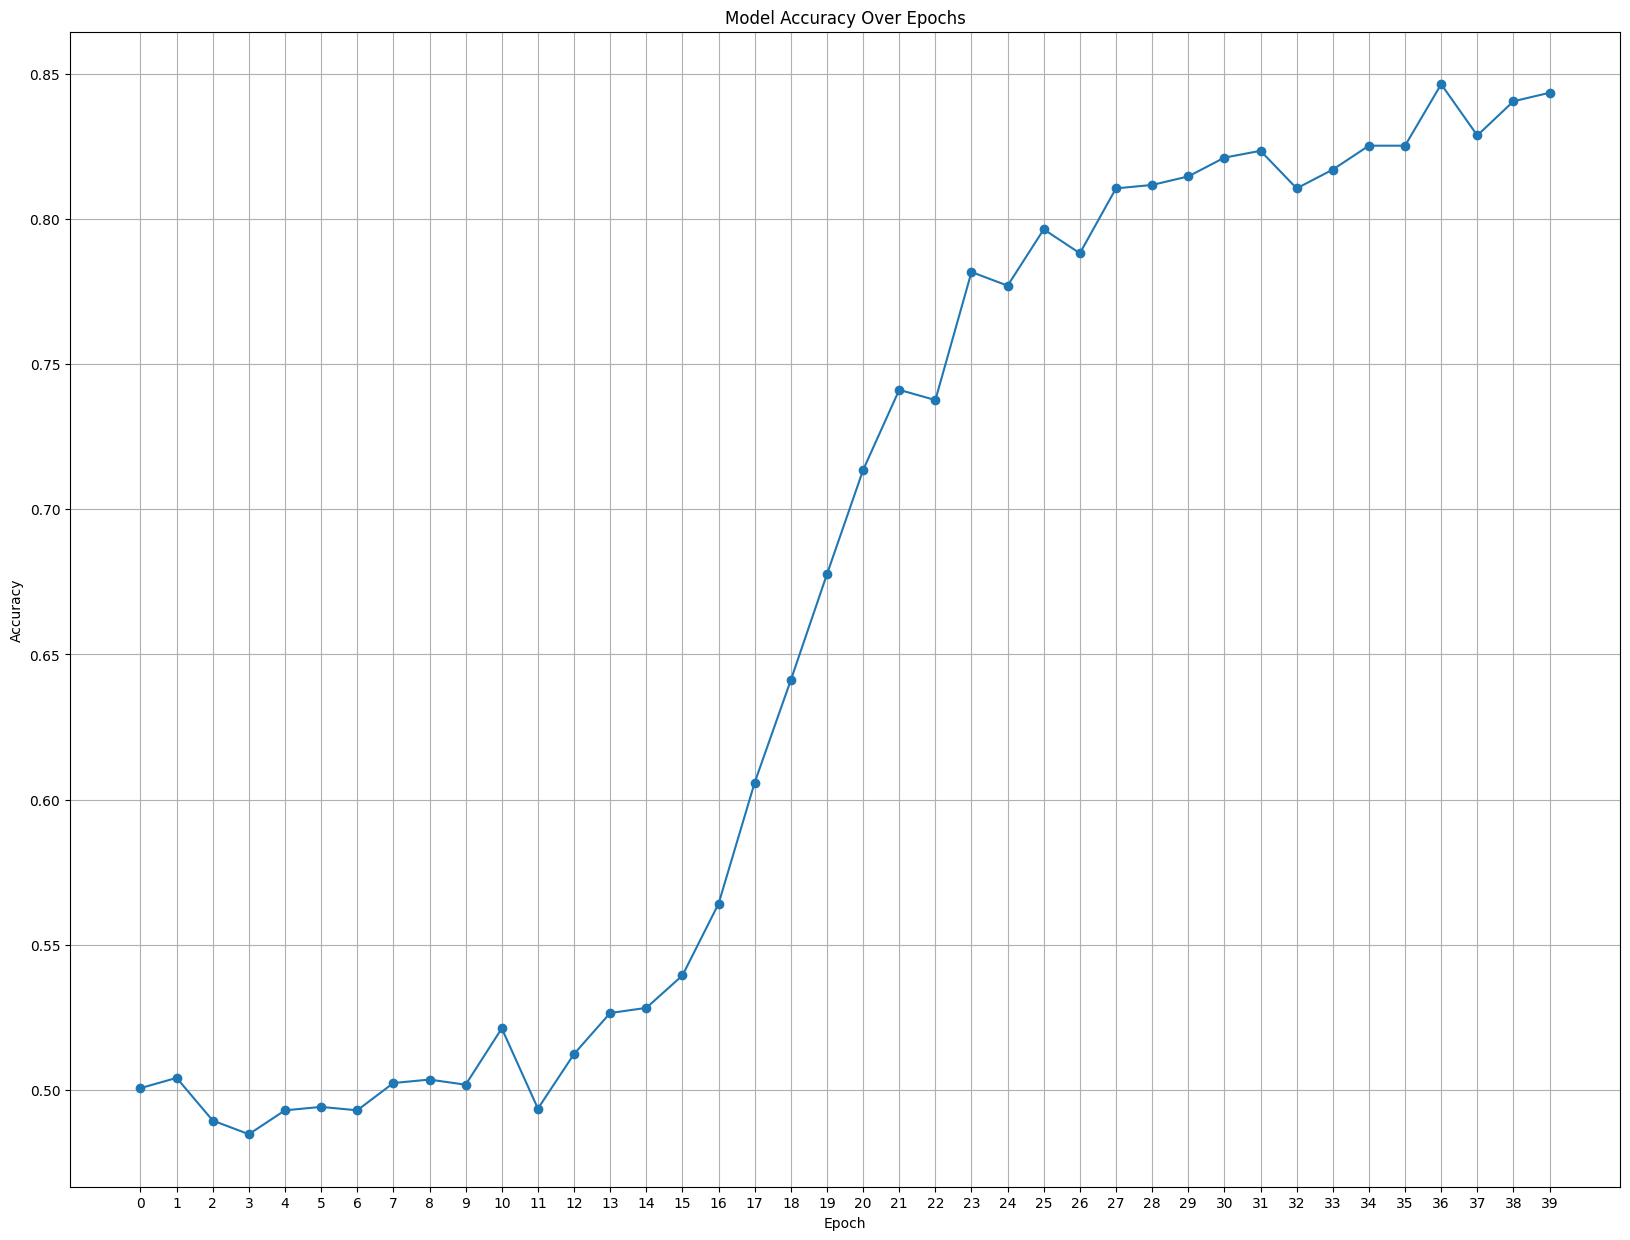

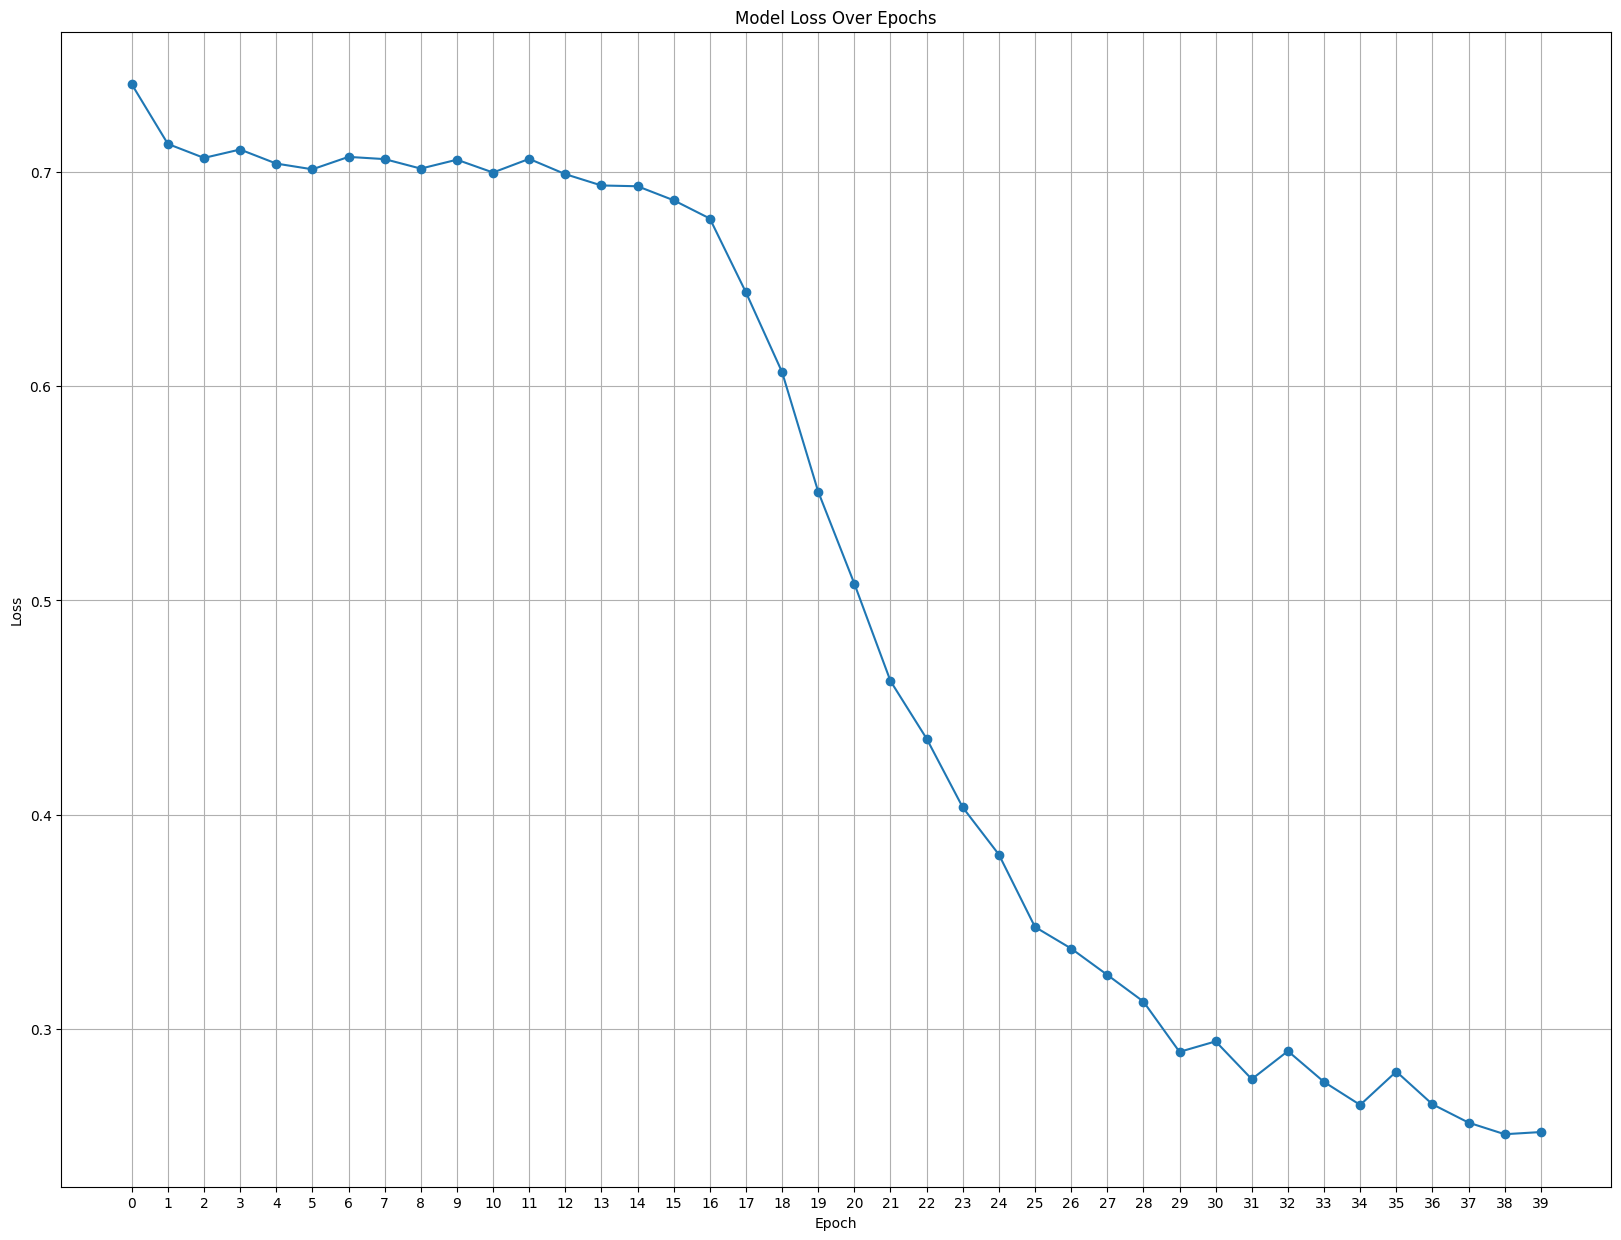

In [ ]:
plt.figure(figsize=(20,15))
plt.plot(epochs, accuracy_values, marker='o')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(epochs)
plt.show()
plt.figure(figsize=(20,15))
plt.plot(epochs, loss_values, marker='o')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.xticks(epochs)
plt.show()

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("UMCU/MedRoBERTa.nl_NegationDetection")
model = AutoModelForSequenceClassification.from_pretrained("UMCU/MedRoBERTa.nl_NegationDetection")
model.to(device)
model.load_state_dict(torch.load("/content/drive/MyDrive/training_data/model_roberta_weights.pth"))

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at UMCU/MedRoBERTa.nl_NegationDetection and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


<All keys matched successfully>

In [ ]:
tokenizer.model_max_length=512

In [ ]:
train_inputs, train_labels, train_masks=embeddings(train_data, tokenizer)
val_inputs, val_labels, val_masks=embeddings(validation_data, tokenizer)
contradict_inputs, contradict_labels, contradict_masks=embeddings(contradict_data, tokenizer)
original_inputs, original_labels, original_masks=embeddings(original_data, tokenizer)
preserving_inputs, preserving_labels, preserving_masks=embeddings(preserving_data, tokenizer)
gold_inputs, gold_labels, gold_masks = embeddings(gold_data, tokenizer)
test_inputs, test_masks=preprocess_data(test_data, tokenizer)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
import torch.optim as optim

batch_size = 16

train_data_t = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data_t)
train_dataloader = DataLoader(train_data_t, sampler=train_sampler, batch_size=batch_size)

validation_data_t = TensorDataset(val_inputs, val_masks, val_labels)
validation_sampler = SequentialSampler(validation_data_t)
validation_dataloader = DataLoader(validation_data_t, sampler=validation_sampler, batch_size=batch_size)

contradict_data_t = TensorDataset(contradict_inputs, contradict_masks, contradict_labels)
contradict_sampler = SequentialSampler(contradict_data_t)
contradict_dataloader = DataLoader(contradict_data_t, sampler=contradict_sampler, batch_size=batch_size)

original_data_t = TensorDataset(original_inputs, original_masks, original_labels)
original_sampler = SequentialSampler(original_data_t)
original_dataloader = DataLoader(original_data_t, sampler=original_sampler, batch_size=batch_size)

preserving_data_t = TensorDataset(preserving_inputs, preserving_masks, preserving_labels)
preserving_sampler = SequentialSampler(preserving_data_t)
preserving_dataloader = DataLoader(preserving_data_t, sampler=preserving_sampler, batch_size=batch_size)

gold_data_t = TensorDataset(gold_inputs, gold_masks, gold_labels)
gold_sampler = SequentialSampler(gold_data_t)
gold_dataloader = DataLoader(gold_data_t, sampler=gold_sampler, batch_size=batch_size)

test_data_t = TensorDataset(test_inputs, test_masks)
test_dataloader = DataLoader(test_data_t, batch_size=batch_size)

optimizer = optim.AdamW(model.parameters(), lr=2e-5)


In [ ]:
from sklearn.metrics import accuracy_score

model.train()
model = model.to(device)
epochs=[]
accuracy_values=[]
loss_values=[]
for epoch in range(50):
    total_correct = 0
    total_samples = 0
    total_loss=0

    for step, batch in enumerate(train_dataloader):
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch
        optimizer.zero_grad()

        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        logits = outputs.logits.detach().cpu().numpy()
        preds = np.argmax(logits, axis=1)
        labels = b_labels.detach().cpu().numpy()
        batch_correct = np.sum(preds == labels)
        batch_samples = labels.size
        total_correct += batch_correct
        total_samples += batch_samples

    avg_epoch_loss = total_loss / len(train_dataloader)
    loss_values.append(avg_epoch_loss)
    epoch_accuracy = total_correct / total_samples
    epochs.append(epoch)
    accuracy_values.append(epoch_accuracy)

    print(f'Epoch {epoch + 1}, Training Accuracy: {epoch_accuracy:.4f}, Loss: {avg_epoch_loss:.4f}')


Epoch 1, Training Accuracy: 0.8371, Loss: 0.2528
Epoch 2, Training Accuracy: 0.8265, Loss: 0.2511
Epoch 3, Training Accuracy: 0.8441, Loss: 0.2446
Epoch 4, Training Accuracy: 0.8435, Loss: 0.2409
Epoch 5, Training Accuracy: 0.8335, Loss: 0.2313
Epoch 6, Training Accuracy: 0.8324, Loss: 0.2334
Epoch 7, Training Accuracy: 0.8465, Loss: 0.2364
Epoch 8, Training Accuracy: 0.8382, Loss: 0.2534
Epoch 9, Training Accuracy: 0.8453, Loss: 0.2281
Epoch 10, Training Accuracy: 0.8494, Loss: 0.2318
Epoch 11, Training Accuracy: 0.8465, Loss: 0.2387
Epoch 12, Training Accuracy: 0.8553, Loss: 0.2307
Epoch 13, Training Accuracy: 0.8559, Loss: 0.2231
Epoch 14, Training Accuracy: 0.8494, Loss: 0.2209
Epoch 15, Training Accuracy: 0.8306, Loss: 0.2483
Epoch 16, Training Accuracy: 0.8247, Loss: 0.2358
Epoch 17, Training Accuracy: 0.8429, Loss: 0.2424
Epoch 18, Training Accuracy: 0.8547, Loss: 0.2202
Epoch 19, Training Accuracy: 0.8453, Loss: 0.2327
Epoch 20, Training Accuracy: 0.8482, Loss: 0.2177
Epoch 21,

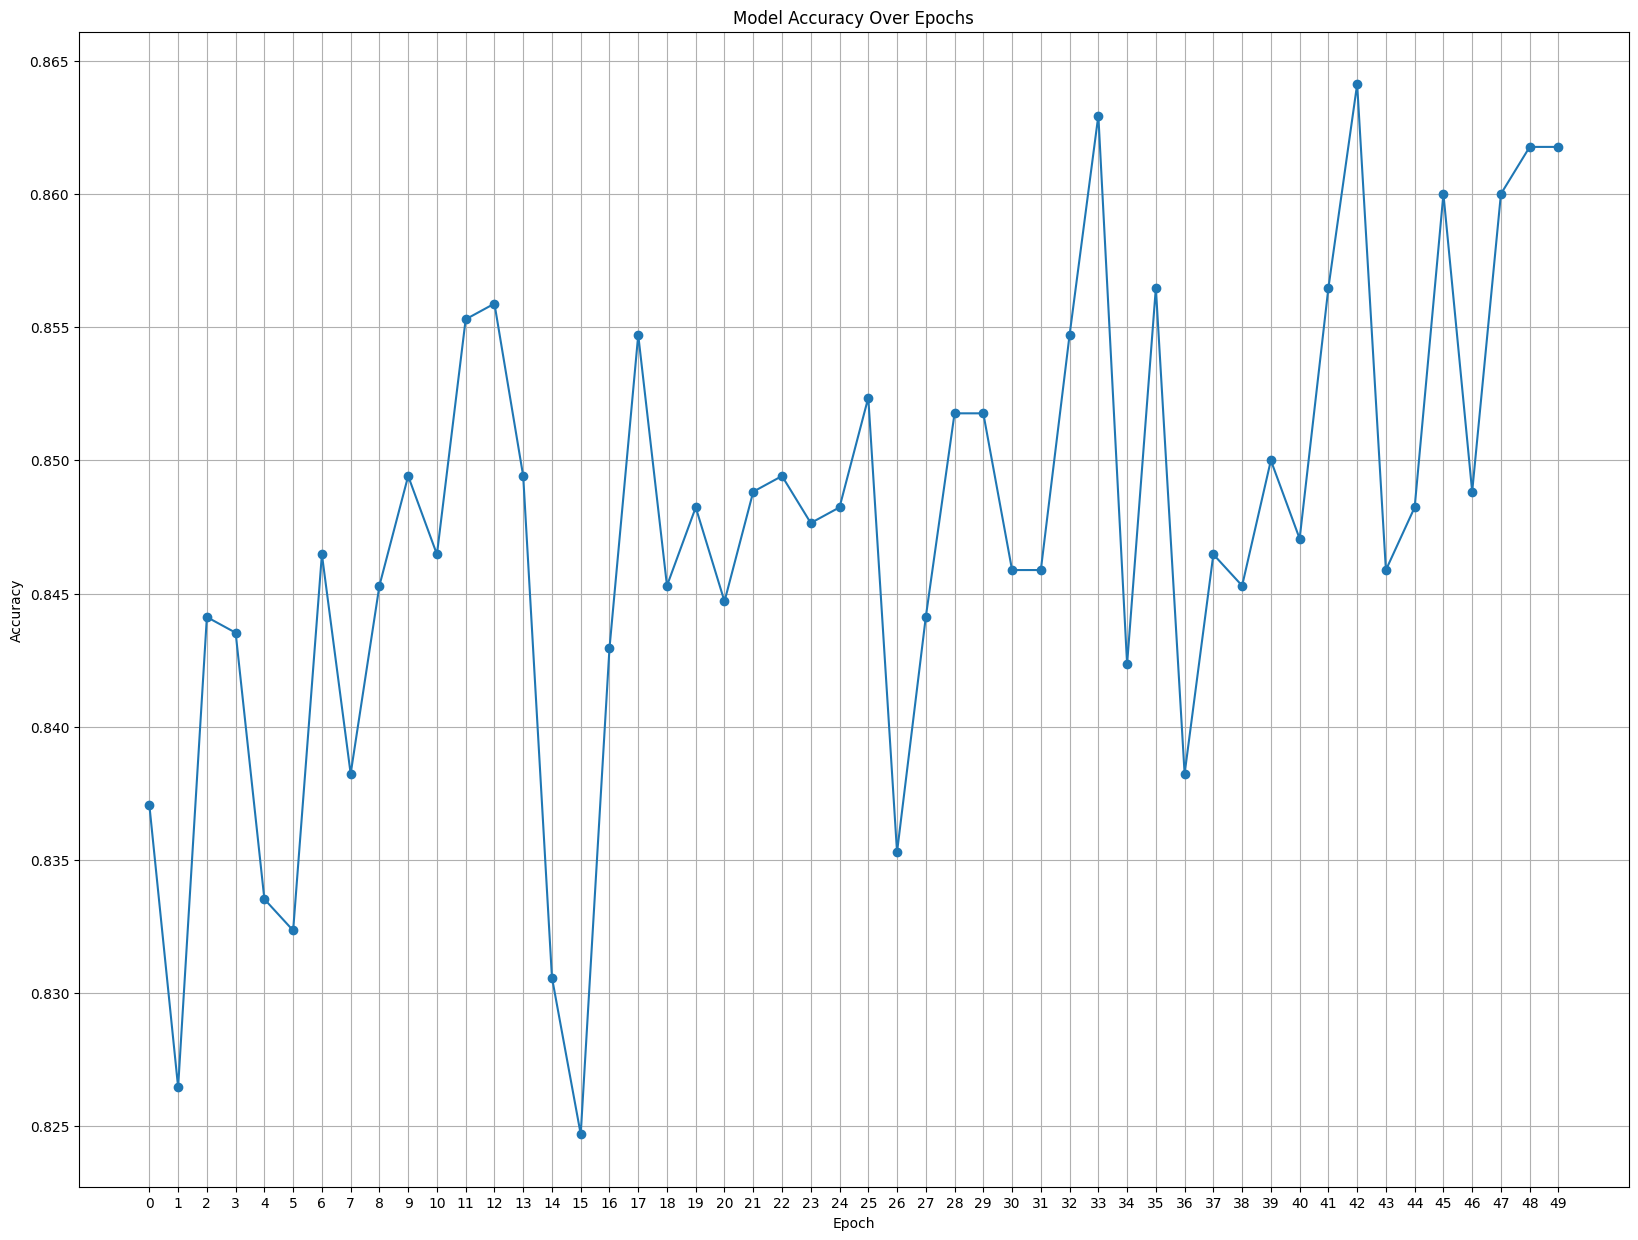

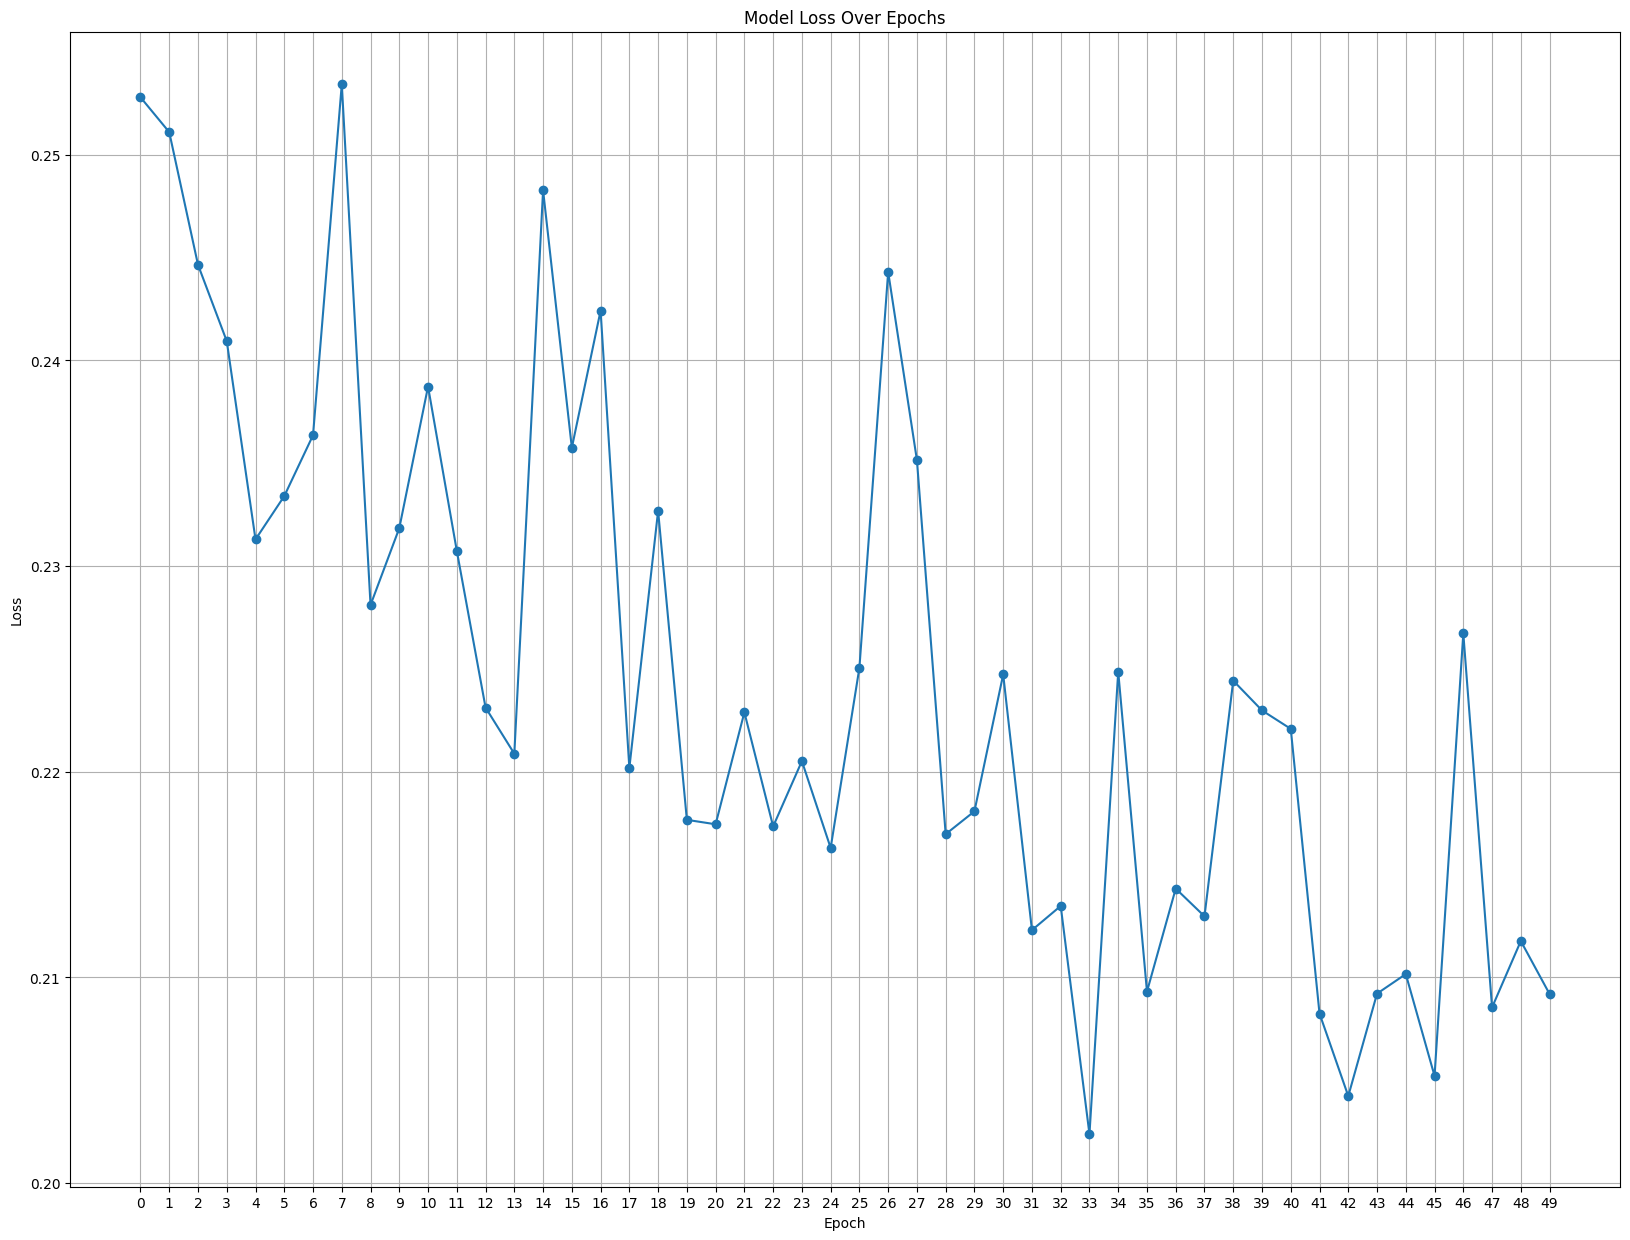

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
plt.plot(epochs, accuracy_values, marker='o')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(epochs)
plt.show()
plt.figure(figsize=(20,15))
plt.plot(epochs, loss_values, marker='o')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.xticks(epochs)
plt.show()

In [ ]:
torch.save(model.state_dict(), 'model_robert_weights.pth')

In [ ]:
output_dir = "/content/drive/MyDrive/training_data/saved_weights1"
model.save_pretrained(output_dir)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
all_true_labels = []
all_predicted_labels = []
val_accuracy = []
val_loss = []

with torch.no_grad():
    for batch in validation_dataloader:
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch
        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
        logits = outputs.logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        preds = np.argmax(logits, axis=1).flatten()
        batch_accuracy = accuracy_score(label_ids, preds)
        val_accuracy.append(batch_accuracy)
        val_loss.append(outputs.loss.item())
        all_true_labels.extend(label_ids)
        all_predicted_labels.extend(preds)

avg_val_loss = sum(val_loss) / len(val_loss)
avg_val_accuracy = sum(val_accuracy) / len(val_accuracy)

macro_f1 = f1_score(all_true_labels, all_predicted_labels, average='macro')

print(f'Validation loss: {avg_val_loss:.3f}')
print(f'Validation accuracy: {avg_val_accuracy:.3f}')
print(f'Macro F1 score: {macro_f1:.3f}')


Validation loss: 1.695
Validation accuracy: 0.538
Macro F1 score: 0.533


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score

c_all_true_labels = []
c_all_predicted_labels = []
c_accuracy = []
c_loss = []

with torch.no_grad():
    for batch in contradict_dataloader:
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch
        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
        logits = outputs.logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        preds = np.argmax(logits, axis=1).flatten()
        batch_accuracy = accuracy_score(label_ids, preds)
        c_accuracy.append(batch_accuracy)
        c_loss.append(outputs.loss.item())
        c_all_true_labels.extend(label_ids)
        c_all_predicted_labels.extend(preds)

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score

o_all_true_labels = []
o_all_predicted_labels = []
o_accuracy = []
o_loss = []

with torch.no_grad():
    for batch in original_dataloader:
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch
        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
        logits = outputs.logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        preds = np.argmax(logits, axis=1).flatten()
        batch_accuracy = accuracy_score(label_ids, preds)
        o_accuracy.append(batch_accuracy)
        o_loss.append(outputs.loss.item())
        o_all_true_labels.extend(label_ids)
        o_all_predicted_labels.extend(preds)

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score

p_all_true_labels = []
p_all_predicted_labels = []
p_accuracy = []
p_loss = []

with torch.no_grad():
    for batch in preserving_dataloader:
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch
        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
        logits = outputs.logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        preds = np.argmax(logits, axis=1).flatten()
        batch_accuracy = accuracy_score(label_ids, preds)
        p_accuracy.append(batch_accuracy)
        p_loss.append(outputs.loss.item())
        p_all_true_labels.extend(label_ids)
        p_all_predicted_labels.extend(preds)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
g_all_true_labels = []
g_all_predicted_labels = []
g_accuracy = []
g_loss = []

with torch.no_grad():
    for batch in gold_dataloader:
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch
        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
        logits = outputs.logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        preds = np.argmax(logits, axis=1).flatten()
        batch_accuracy = accuracy_score(label_ids, preds)
        g_accuracy.append(batch_accuracy)
        g_loss.append(outputs.loss.item())
        g_all_true_labels.extend(label_ids)
        g_all_predicted_labels.extend(preds)

avg_g_val_loss = sum(g_loss) / len(g_loss)
avg_g_val_accuracy = sum(g_accuracy) / len(g_accuracy)

macro_f1 = f1_score(g_all_true_labels, g_all_predicted_labels, average='macro')

print(f'Validation loss for gold practice test: {avg_g_val_loss:.3f}')
print(f'Validation accuracy for gold practice test: {avg_g_val_accuracy:.3f}')
print(f'Macro F1 score for gold practice test: {macro_f1:.3f}')


Validation loss for gold practice test: 1.811
Validation accuracy for gold practice test: 0.483
Macro F1 score for gold practice test: 0.481


In [ ]:
faithfulness = Faithfulness(o_all_predicted_labels, c_all_predicted_labels)
consistency = Consistency(o_all_predicted_labels, p_all_predicted_labels)
print(faithfulness)
print(consistency)

0.455
0.5733333333333334


In [ ]:
all_predicted_labels = []
all_logits = []

model.eval()

with torch.no_grad():
    for batch in test_dataloader:
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask = batch
        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
        logits = outputs.logits.detach().cpu().numpy()
        preds = np.argmax(logits, axis=1).flatten()
        all_predicted_labels.extend(preds)
        all_logits.extend(logits)

print(all_predicted_labels)

[0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 